Packages imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data loading

In [48]:
# transaction data
df = pd.read_excel('../transactions.xlsx')
# contracts linked to MakerDAO
mkr_contracts = pd.read_excel('maker_contracts.xlsx')
# smart contracts that own a maker vault
vaults_contracts = pd.read_excel('vaults_contracts.xlsx')
# vaults owners
vaults = pd.read_excel('vaults.xlsx')

## Quick data check

In [4]:
df.token_symbol = df.token_symbol.astype(str)

In [ ]:
df.info()

In [5]:
columns = df.columns

In [7]:
df.shape

(331087, 7)

## Evolution of the number of transactions

In [8]:
df.time = pd.to_datetime(df.time, format="%Y-%m-%d %H:%M:%S")
df_time = df.copy()
df_time.set_index(df_time.time, inplace=True)
df_time['count'] = 1

In [9]:
dai = df_time[df_time.token_symbol=='DAI']
mkr = df_time[df_time.token_symbol=='MKR']

In [10]:
y_dai = dai.resample('D').count()['count']
y_mkr = mkr.resample('D').count()['count']

In [11]:
y_dai.tail()

time
2022-06-17    11907
2022-06-18    21727
2022-06-19    17718
2022-06-20    18937
2022-06-21    10980
Freq: D, Name: count, dtype: int64

In [12]:
x = pd.date_range(start='2022-05-27', end='2022-06-21')

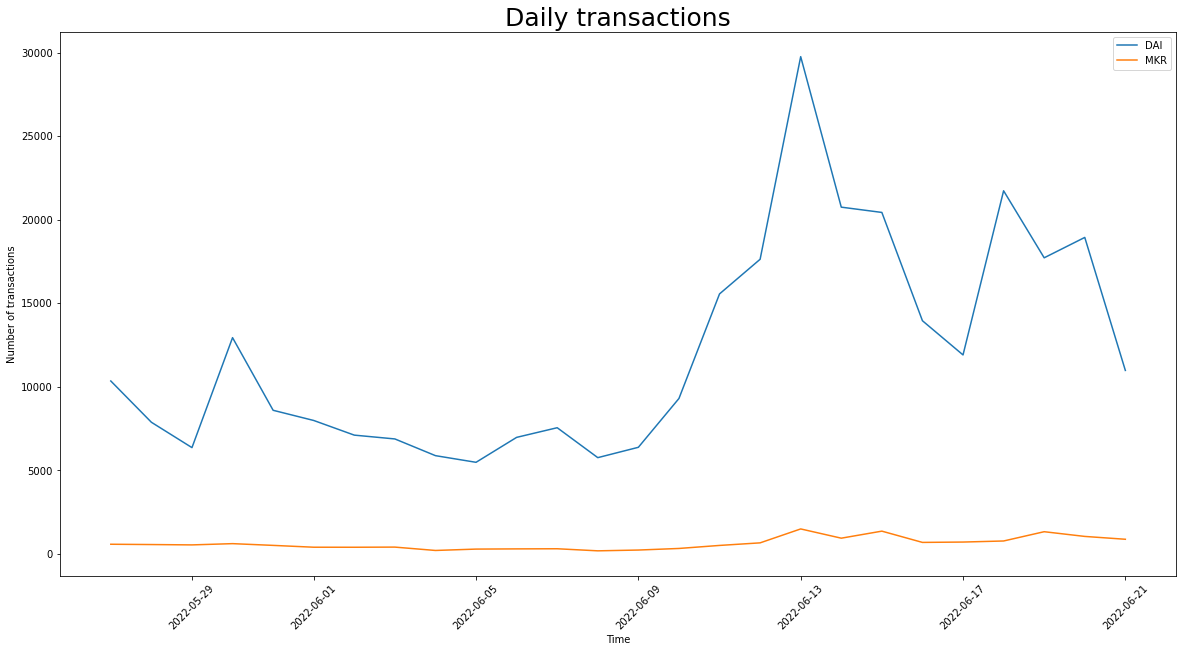

In [66]:
plt.figure(figsize=(20, 10))
plt.plot(x, y_dai, label = "DAI")
plt.plot(x, y_mkr, label = "MKR")
plt.legend()
plt.title('Daily transactions', fontsize=25)
plt.xlabel('Time')
plt.ylabel('Number of transactions')
plt.xticks(rotation=45)
plt.show()

In [13]:
print(len(df.sender.unique()))
print(len(df.recipient.unique()))

61271
57356


## Distribution of transactions

In [6]:
dai = df[df.token_symbol=='DAI']
mkr = df[df.token_symbol=='MKR']

In [7]:
dai_sender_distribution = dai.sender.value_counts()
dai_recipient_distribution = dai.recipient.value_counts()

In [8]:
dai_sender_distribution.values

array([12653,  8847,  7503, ...,     1,     1,     1], dtype=int64)

In [9]:
len(dai_sender_distribution)

59609

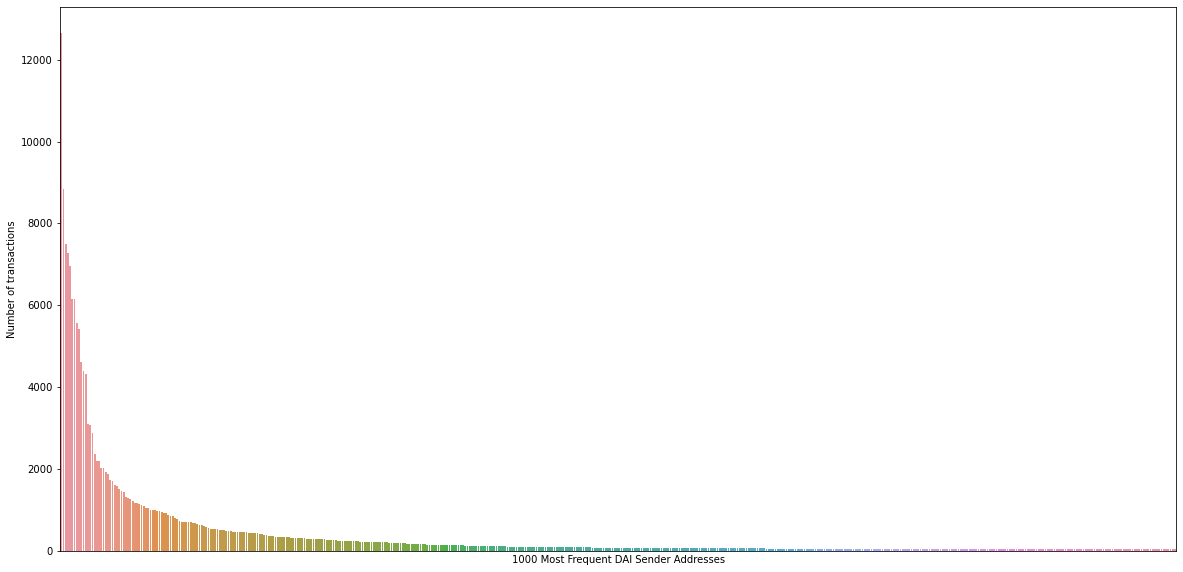

In [20]:
plt.figure(figsize=(20,10))
ax = sns.barplot(y=dai_sender_distribution.values[:500], x=dai_sender_distribution.index[:500])
plt.xticks([])
plt.xlabel('1000 Most Frequent DAI Sender Addresses')
plt.ylabel('Number of transactions')
plt.show()

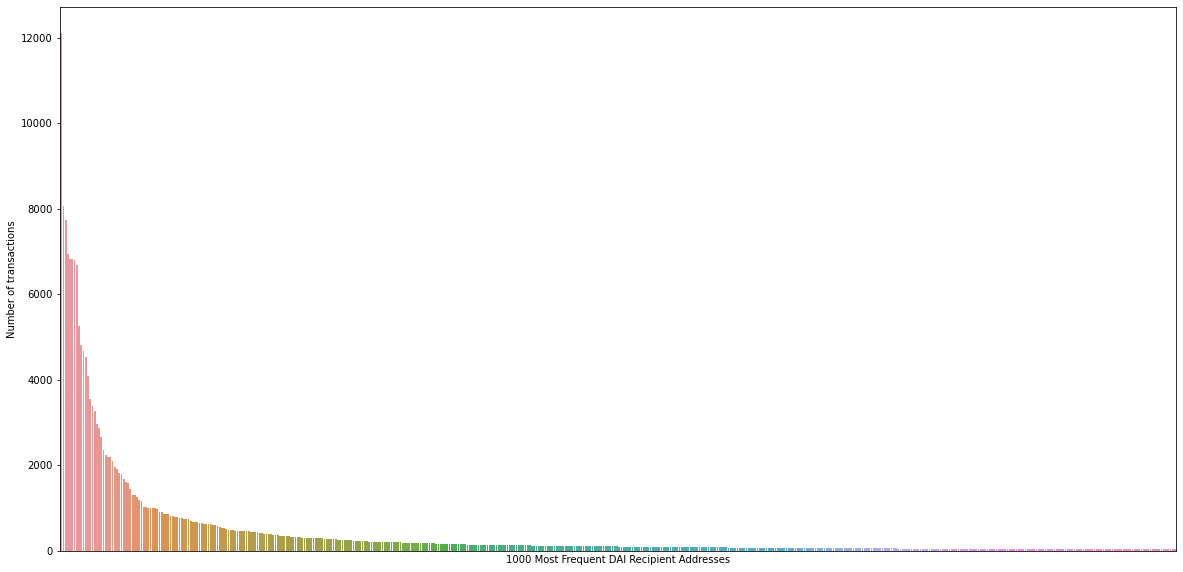

In [21]:
plt.figure(figsize=(20,10))
ax = sns.barplot(y=dai_recipient_distribution.values[:500], x=dai_recipient_distribution.index[:500])
plt.xticks([])
plt.xlabel('1000 Most Frequent DAI Recipient Addresses')
plt.ylabel('Number of transactions')
plt.show()

In [22]:
mkr_sender_distribution = mkr.sender.value_counts()
mkr_recipient_distribution = mkr.recipient.value_counts()

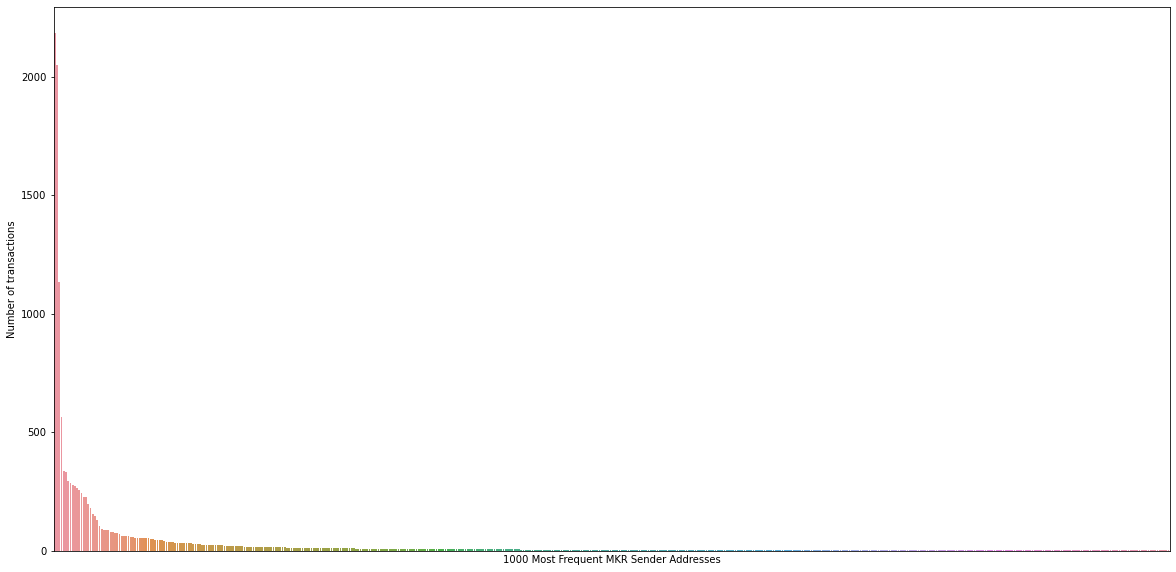

In [23]:
plt.figure(figsize=(20,10))
ax = sns.barplot(y=mkr_sender_distribution.values[:500], x=mkr_sender_distribution.index[:500])
plt.xticks([])
plt.xlabel('1000 Most Frequent MKR Sender Addresses')
plt.ylabel('Number of transactions')
plt.show()

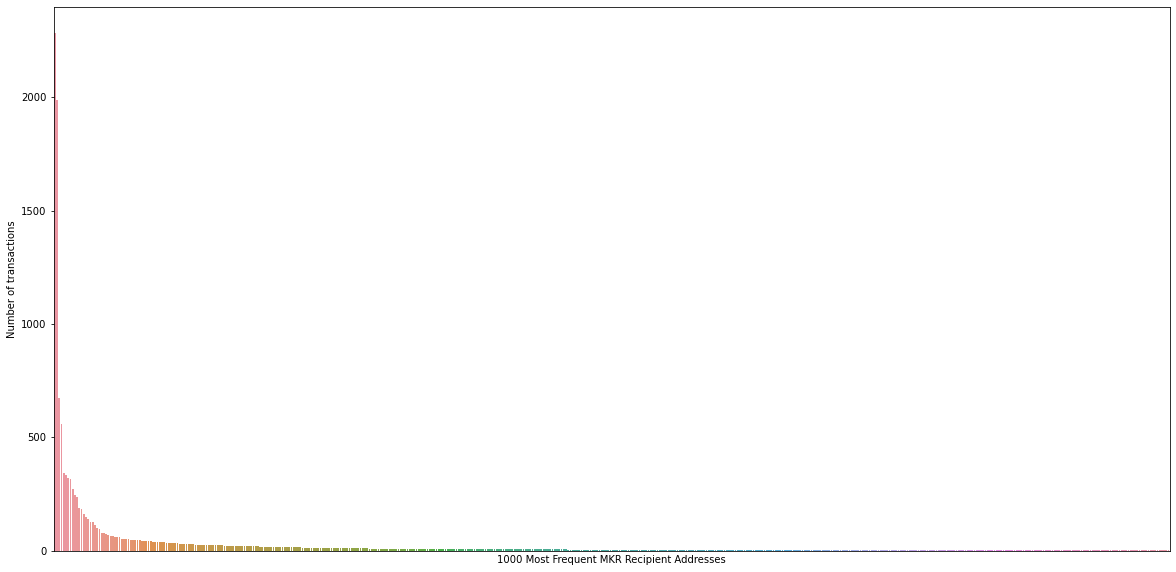

In [24]:
plt.figure(figsize=(20,10))
ax = sns.barplot(y=mkr_recipient_distribution.values[:500], x=mkr_recipient_distribution.index[:500])
plt.xticks([])
plt.xlabel('1000 Most Frequent MKR Recipient Addresses')
plt.ylabel('Number of transactions')
plt.show()

In [25]:
dai_sender_distribution[dai_sender_distribution.values == 1]

f64fb4d30523f5efbef801972c21fd8bd02db85f    1
138dcff69e47d31d88b920c61782b897f5422bf1    1
4cd519021814286a612459a633732274eea6ddd9    1
d76bacf34f185a8bfa47d2e62d4ac182b2608c08    1
e1fe95a0c40fdbd69855b32c9fdf428a38051941    1
                                           ..
e67a6b14ad995bac960b53fe0a105f2f137ef885    1
a1c77ce2371f11f5ed8c01ce5ca8d8748b4d70ad    1
df8eef2a68775db7fb3179e243231e06d7d75113    1
fa96990f69a2dcffea029f57f41be3c72dffc39d    1
e21623cdf2a6f464ad21c920521980ebde28ba91    1
Name: sender, Length: 41874, dtype: int64

In [26]:
print(f'DAI Sender: {len(dai_sender_distribution[dai_sender_distribution.values == 1]) / len(dai_sender_distribution)}')
print(f'DAI Recipient: {len(dai_recipient_distribution[dai_recipient_distribution.values == 1]) / len(dai_recipient_distribution)}')
print(f'MKR Sender: {len(mkr_sender_distribution[mkr_sender_distribution.values == 1]) / len(mkr_sender_distribution)}')
print(f'MKR Recipient: {len(mkr_recipient_distribution[mkr_recipient_distribution.values == 1]) / len(mkr_recipient_distribution)}')

DAI Sender: 0.7024778137529568
DAI Recipient: 0.71474784189005
MKR Sender: 0.7310642377756472
MKR Recipient: 0.7432384966631542


In [29]:
dai_sender_distribution

60594a405d53811d3bc4766596efd80fd545a270    12653
74de5d4fcbf63e00296fd95d33236b9794016631     8847
a478c2975ab1ea89e8196811f51a7b7ade33eb11     7503
5777d92f208679db4b9778590fa3cab3ac9e2168     7283
220bda5c8994804ac96ebe4df184d25e5c2196d4     6950
                                            ...  
e67a6b14ad995bac960b53fe0a105f2f137ef885        1
a1c77ce2371f11f5ed8c01ce5ca8d8748b4d70ad        1
df8eef2a68775db7fb3179e243231e06d7d75113        1
fa96990f69a2dcffea029f57f41be3c72dffc39d        1
e21623cdf2a6f464ad21c920521980ebde28ba91        1
Name: sender, Length: 59609, dtype: int64

In [30]:
dai_recipient_distribution

60594a405d53811d3bc4766596efd80fd545a270    12108
5777d92f208679db4b9778590fa3cab3ac9e2168     8055
0                                            7728
220bda5c8994804ac96ebe4df184d25e5c2196d4     6947
ba12222222228d8ba445958a75a0704d566bf2c8     6834
                                            ...  
94733363b33b2a0b1d79e819753ec3450be78437        1
34b6e9f3eaaf31f2be5b81da4bdc4b076f0a76c9        1
b93e48ef58814d5c5aff5c66561ea7be68ef83ac        1
1f822d82d920256a839a4e9816344c4beb653132        1
4f1e49f53e4316d356a7406b7e79032b8a3e9f1a        1
Name: recipient, Length: 55025, dtype: int64

In [27]:
mkr_sender_distribution

e8c6c9227491c0a8156a0106a0204d881bb7e531    2185
56178a0d5f301baf6cf3e1cd53d9863437345bf9    2051
95a9bd206ae52c4ba8eecfc93d18eacdd41c88cc    1135
c2adda861f89bbb333c90c492cb837741916a225     566
fa103c21ea2df71dfb92b0652f8b1d795e51cdef     336
                                            ... 
51c545342bc34dcca5ded7991f34ef3a55067cf9       1
83e1d69a74029724d577ea5c7ee71c4c97f06ac0       1
cdb792c14391f7115ba77a7cd27f724fc9ea2091       1
a1a670d5fcd74dd496a93644c11eb750b18e1526       1
9939baac839d983ff4cc4cd586d459b492563c61       1
Name: sender, Length: 2086, dtype: int64

In [28]:
mkr_recipient_distribution

56178a0d5f301baf6cf3e1cd53d9863437345bf9    2283
e8c6c9227491c0a8156a0106a0204d881bb7e531    1986
95a9bd206ae52c4ba8eecfc93d18eacdd41c88cc     674
c2adda861f89bbb333c90c492cb837741916a225     560
fa103c21ea2df71dfb92b0652f8b1d795e51cdef     342
                                            ... 
fc4e49b2087561347b71964f170ef8aa628742b9       1
960e018de0656ae472527241b25145f0695e0eb0       1
0edd65f78ad65809f9b92e09e895876c02c8dfbf       1
877ab5404cc9f01f67fdee7e92a5b34f66b0d972       1
34364e234b3dd02ff5c8a2ad9ba86bbd3d3d3284       1
Name: recipient, Length: 2847, dtype: int64

## Vaults owners

In [49]:
vaults.head()

,Address,Balance,Txn Count
0,0x87a67e7dc32fdc79853d780c6f516312b4a503b5,1.009860,235
1,0x8e02247d3ee0e6153495c971ffd45aa131f4d7cb,9.351423,337
2,0x94fa8efdd58e1721ad8bf5d4001060e0e1c4d58e,1.943644,273
3,0x98279e4c1b78689483ccb18a903e7234e3c91783,9.356882,119
4,0x9b7a6e6b894e243e994cfaa32ea07d8a60740981,5.253629,1571


In [51]:
vaults.drop_duplicates(inplace=True)
vaults.columns = ['address', 'balance', 'txn_count']

In [57]:
vaults_sorted_balance = vaults.sort_values('balance', ascending=False)

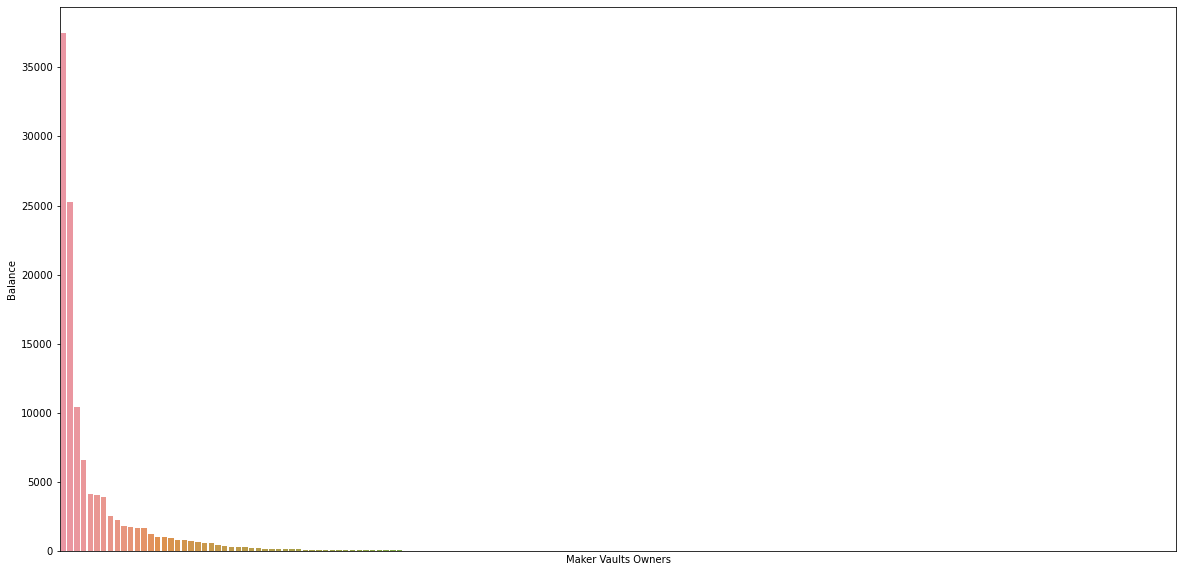

In [58]:
plt.figure(figsize=(20,10))
ax = sns.barplot(y=vaults_sorted_balance.balance, x=vaults_sorted_balance.address)
plt.xticks([])
plt.xlabel('Maker Vaults Owners')
plt.ylabel('Balance')
plt.show()

In [59]:
vaults_sorted_balance

,address,balance,txn_count
54,0xf39d30fa570db7940e5b3a3e42694665a1449e4b,37487.105152,2857
125,0xfb626333099a91ab677bcd5e9c71bc4dbe0238a8,25283.970238,1658
254,0x65b0bf8ee4947edd2a500d74e50a3d757dc79de0,10381.924453,1921
222,0xf70c1cb0a9833ba9613f054db71ab3eaf45060b6,6587.516837,1465
148,0x6555e1cc97d3cba6eaddebbcd7ca51d75771e0b8,4132.827624,2402
...,...,...,...
86,0x3d5569d3e5f4ebd45a1fb243d479d174c83f583f,0.050853,1084
41,0xc45d8a160678eb77ba326f7a949d66b47426b013,0.043790,217
19,0x055ad5e56c11c0ef55818155c69ed9ba2f4b3e90,0.010830,1103
87,0x2c51978916976e9041d22e3b164f033e553e2c3d,0.000149,407


In [61]:
vaults_sorted_balance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 54 to 96
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   address    166 non-null    object 
 1   balance    166 non-null    float64
 2   txn_count  166 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 5.2+ KB


In [63]:
len(vaults_sorted_balance[vaults_sorted_balance.balance < 1]) / len(vaults_sorted_balance)

0.3192771084337349

In [68]:
vaults_sorted_balance.iloc[0, 1] / vaults_sorted_balance.balance.sum()

0.32579699121007355

In [67]:
vaults_sorted_balance.balance.sum()

115062.77271839

In [69]:
vaults_sorted_txn = vaults.sort_values('txn_count', ascending=False)

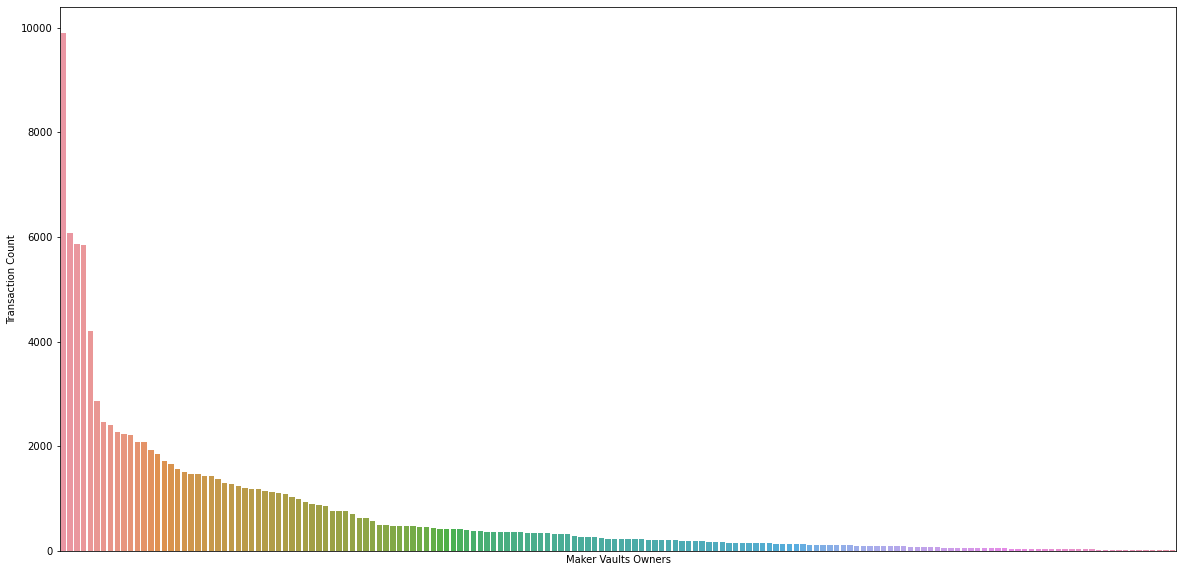

In [70]:
plt.figure(figsize=(20,10))
ax = sns.barplot(y=vaults_sorted_txn.txn_count, x=vaults_sorted_txn.address)
plt.xticks([])
plt.xlabel('Maker Vaults Owners')
plt.ylabel('Transaction Count')
plt.show()

In [71]:
vaults_sorted_txn

,address,balance,txn_count
38,0xb0e83c2d71a991017e0116d58c5765abc57384af,1.831602,9899
114,0x4f58985b75eec8f14c536878a19eadf4a1960d6c,20.523164,6072
233,0x79a98a9f41051e119cad1b9ffefe523cd0be65f0,251.356630,5869
29,0x29aa2ed8712072e918632259780e587698ef58df,0.499907,5844
156,0xa6e2e910515e6cf485462eeb6e454df33c60cb0e,1.240695,4203
...,...,...,...
16,0xfbae74d6b7b0802debccd3411597cd4bda5b3064,0.820115,13
39,0xb6b724452850356dc2a5fc7ff5337e1c9d66f377,898.987427,12
195,0xb5b361e55067a2e9505f7f9730646379b13f0de0,1226.689848,11
33,0xdd12a74607e8ed332e3dd37ec2b987fdbdfc59d5,1782.594445,9


In [73]:
vaults_sorted_txn.txn_count.sum()

111296

In [78]:
col1 = vaults_sorted_balance.index
col2 = vaults_sorted_txn.index

In [79]:
col1

Int64Index([ 54, 125, 254, 222, 148, 239,   5, 109,  70,  33,
            ...
             51,  53,  83, 192, 224,  86,  41,  19,  87,  96],
           dtype='int64', length=166)

In [81]:
col1 = pd.Series(col1)
col2 = pd.Series(col2)

In [82]:
col1.corr(col2)

0.04844400967272852

## Using Transaction Data and Vault ownership data

In [85]:
vaults_addresses = vaults.address

In [86]:
dai2 = dai.copy()

In [88]:
mask = []
for index, row in dai2.iterrows():
    if (row['sender'] in vaults_addresses or row['recipient'] in vaults_addresses):
        mask.append(index)

In [98]:
dai_vaults = dai.loc[mask]
dai_vaults.reset_index(inplace=True)
dai_vaults.value = np.array(dai_vaults.value) / 1000000000000000000

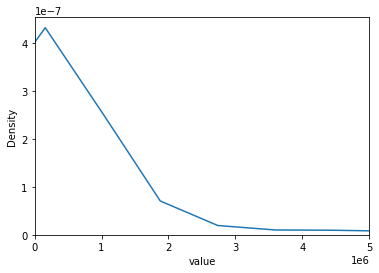

In [126]:
sns.kdeplot(data=dai_vaults, x='value')
plt.xlim((0, 5000000))
plt.show()

In [127]:
dai_vaults.value.max()

166078032.14256102

In [128]:
dai_vaults_sender_distribution = dai_vaults.sender.value_counts()
dai_vaults_recipient_distribution = dai_vaults.recipient.value_counts()

In [129]:
dai_vaults_recipient_distribution

0                                           7728
2a49eae5cca3f050ebec729cf90cc910fadaf7a2     858
220bda5c8994804ac96ebe4df184d25e5c2196d4     533
def171fe48cf0115b1d80b88dc8eab59176fee57     313
ed3a954c0adfc8e3f85d92729c051ff320648e30     187
                                            ... 
5f02ecf0bad91678aed7273643aaffb9bc7075e2       1
a9dee54892713f43c221509cfedbd717d16791a0       1
2268f9ec3bcb86ae9dd5f6419b4d24af79ddb3a1       1
d7129fc6118a7bc6197d6f3dace7757b05339f22       1
55a0557eba3614b4236ee151f812a7242f27ca38       1
Name: recipient, Length: 569, dtype: int64

In [131]:
dai_vaults_sender_distribution[:15]

0                                           4333
89b78cfa322f6c5de0abceecab66aee45393cc5a    1587
1eb4cf3a948e7d72a198fe073ccb8c7a948cd853     970
2a49eae5cca3f050ebec729cf90cc910fadaf7a2     486
bc12bc3cdcae9e48902fd3ef7cf85a871adc9791     392
961ae24a1ceba861d1fdf723794f6024dc5485cf      68
4bbc507ca4417625e20199644523f4d92df927b1      51
55fa1d3a3bc07b30f71ae87209451afcbd78d800      45
ed3a954c0adfc8e3f85d92729c051ff320648e30      45
184036965274c6d11d65bd503c2428d31bafe62d      42
db9c76109d102d2a1e645dca3a7e671ebfd8e11a      40
b012bfb2c024a3363f49529035e98eeadb89da2b      40
2e173e71e8021d641c98d04336a6b6d00a8869c3      35
3f6f4142e571c6cb7368e78848e05dc31e677a55      28
8f95f14b0013a8eda8e21f2c0b9fba2d34057491      27
Name: sender, dtype: int64

0
contract idem
contract (1inch.exchange) - DEX aggregator solution that searches deals across multiple liquidity sources, offering users better rates than any individual exchange.
contract - random address
contract - random address

In [133]:
dai_vaults_sender_distribution.values[1:]

array([1587,  970,  486, ...,    1,    1,    1], dtype=int64)

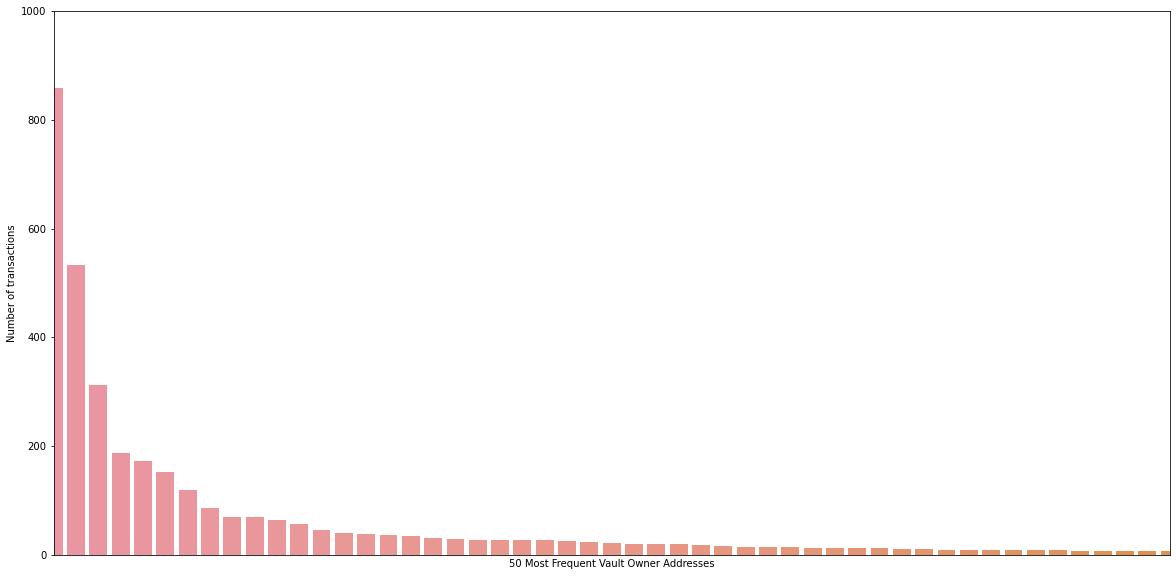

In [138]:
plt.figure(figsize=(20,10))
ax = sns.barplot(y=dai_vaults_recipient_distribution.values[1:], x=dai_vaults_recipient_distribution.index[1:])
plt.xticks([])
plt.xlabel('50 Most Frequent Vault Owner Addresses')
plt.ylabel('Number of transactions')
plt.xlim((0, 50))
plt.ylim((0, 1000))
plt.show()